In [1]:
import pandas as pd

df = pd.read_csv('/content/Pharma_Industry.csv')
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


## Exploratory Data Analysis (EDA)

Perform fundamental data exploration, including displaying data types, missing values, descriptive statistics. Utilize histograms, box plots, or density plots to understand feature distributions and investigate feature correlations to discern relationships within the data. Provide clear legends for all visualizations.


In [2]:
print("Data Types:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB

Missing Values:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

Descriptive Statistics:
       Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM) 

Generating Histograms for Numerical Features...


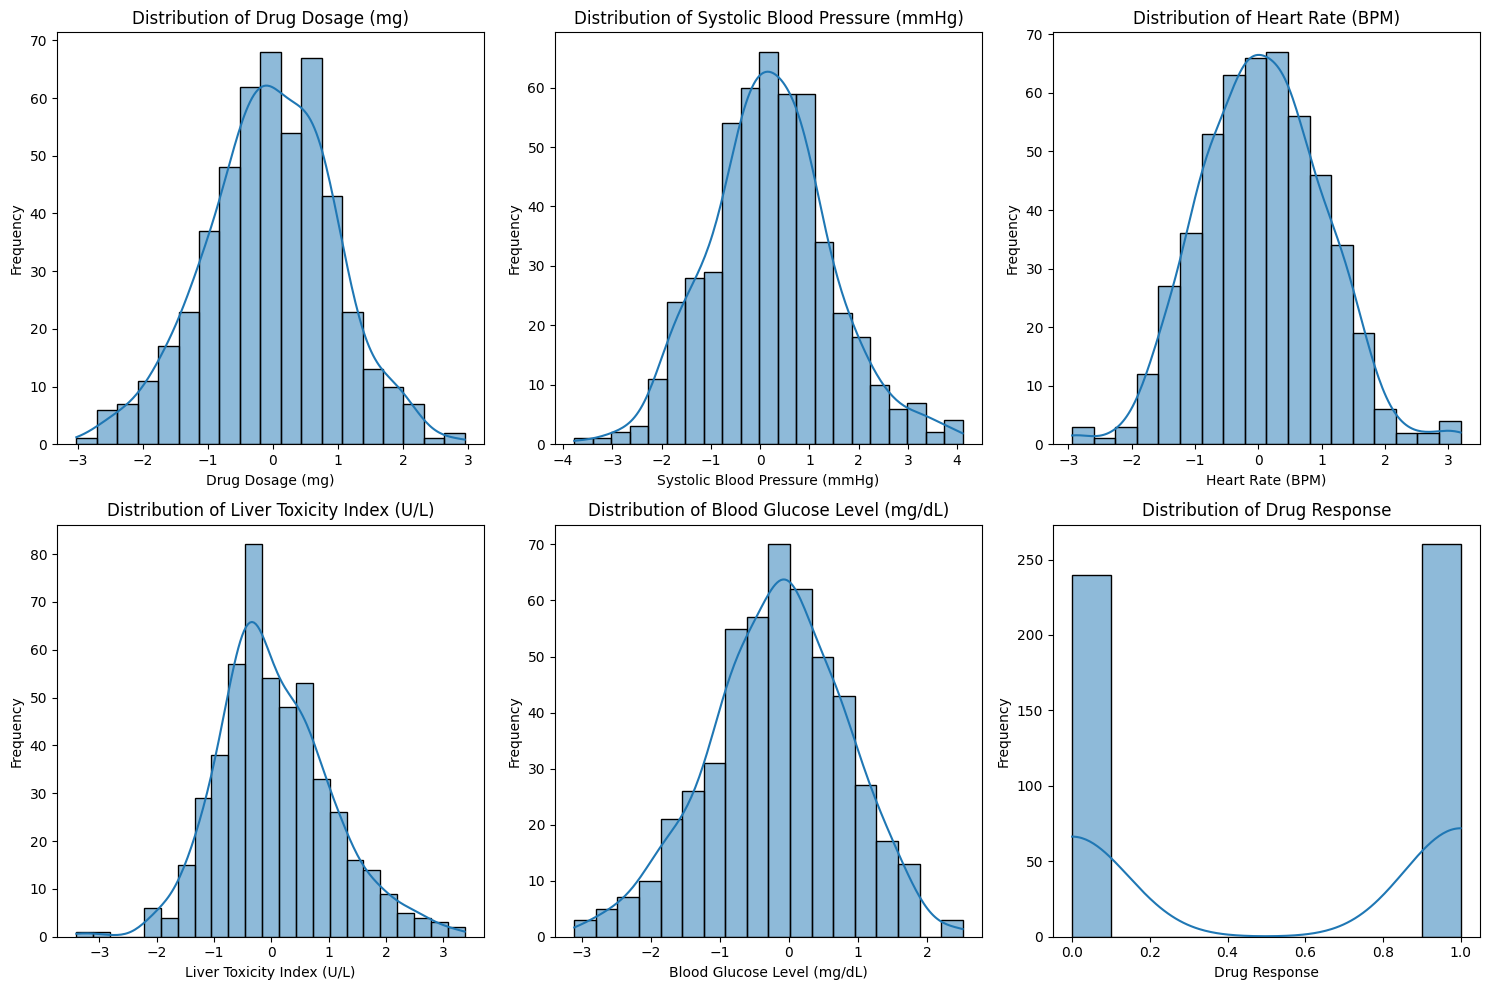


Generating Box Plots for Numerical Features...


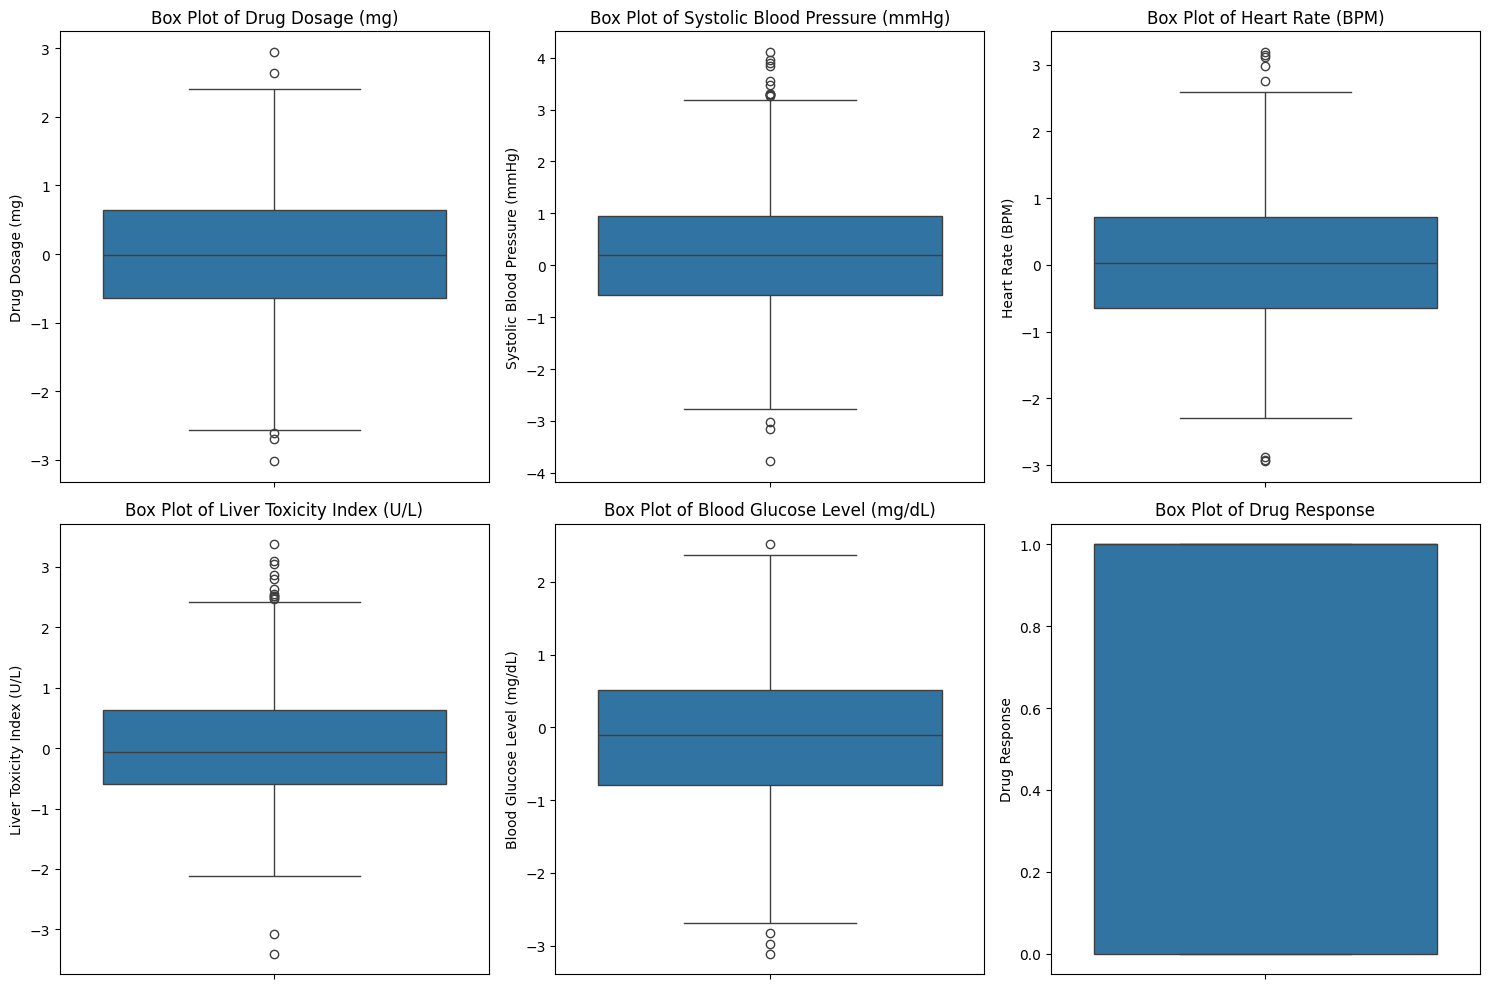

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns (excluding 'Drug Response' if it's considered categorical for classification)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Assuming 'Drug Response' is the target variable and we want to see its distribution too, or treat it separately.
# For now, let's include it, but be mindful of its binary nature.

print("Generating Histograms for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nGenerating Box Plots for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Calculating Correlation Matrix...

Correlation Matrix:
                                Drug Dosage (mg)  \
Drug Dosage (mg)                        1.000000   
Systolic Blood Pressure (mmHg)          0.090618   
Heart Rate (BPM)                        0.040571   
Liver Toxicity Index (U/L)              0.128127   
Blood Glucose Level (mg/dL)             0.012434   
Drug Response                           0.043457   

                                Systolic Blood Pressure (mmHg)  \
Drug Dosage (mg)                                      0.090618   
Systolic Blood Pressure (mmHg)                        1.000000   
Heart Rate (BPM)                                     -0.039195   
Liver Toxicity Index (U/L)                            0.283672   
Blood Glucose Level (mg/dL)                           0.037228   
Drug Response                                         0.305226   

                                Heart Rate (BPM)  Liver Toxicity Index (U/L)  \
Drug Dosage (mg)                     

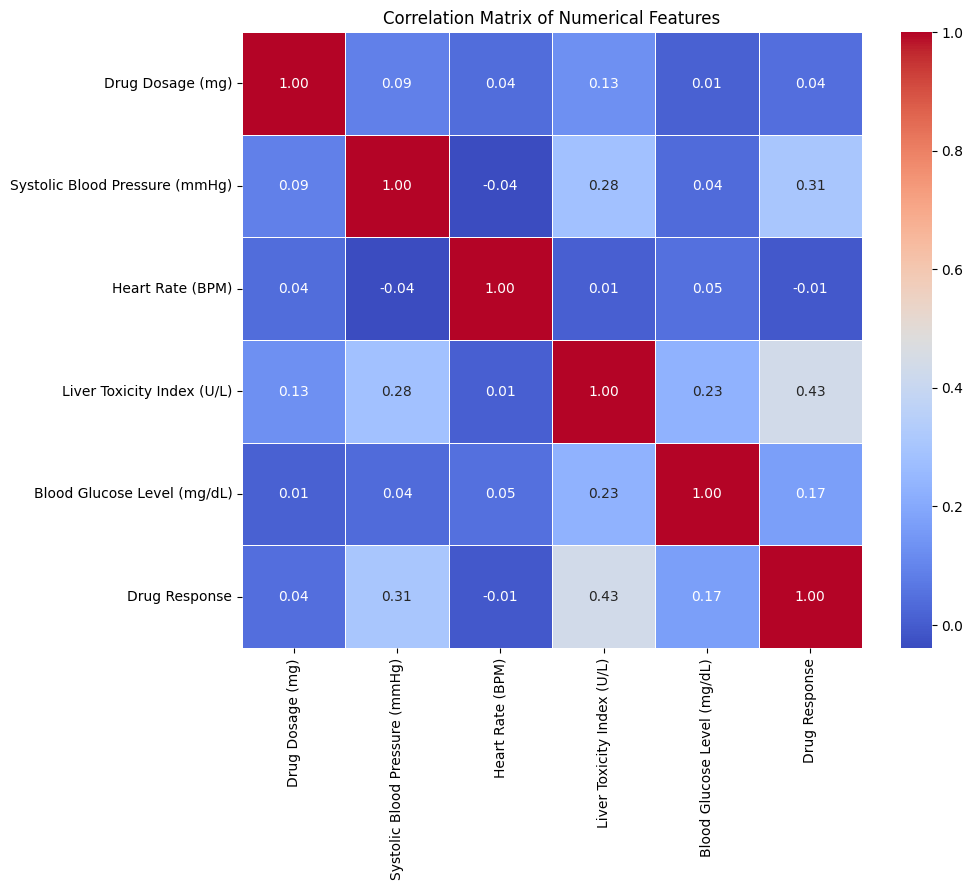

In [4]:
print("Calculating Correlation Matrix...")
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nGenerating Heatmap for Correlation Matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing

Split the dataset into training and testing sets for model development and evaluation.


In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (y)
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (400, 5)
Shape of X_test: (100, 5)
Shape of y_train: (400,)
Shape of y_test: (100,)


## Data Visualization

Employ scatter plots, pair plots, or other relevant visualizations to comprehend feature distributions and relationships. Visualize class distributions to gauge dataset balance or imbalance. Ensure all plots have clear legends.


Visualizing the distribution of the target variable 'Drug Response'...


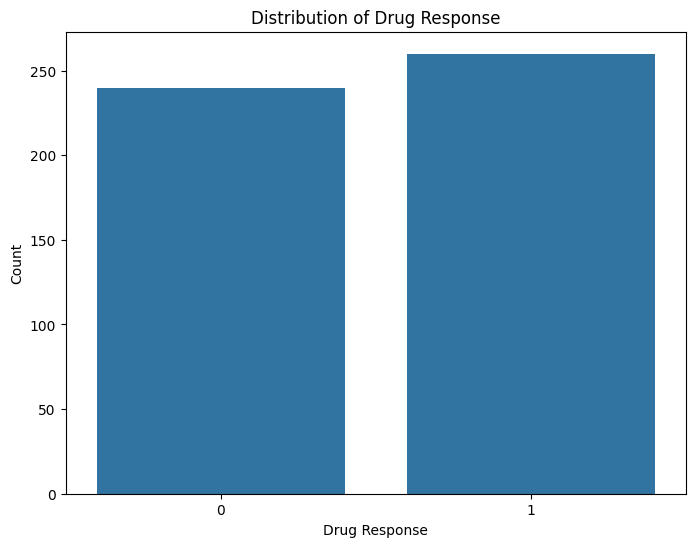

In [6]:
print("Visualizing the distribution of the target variable 'Drug Response'...")
plt.figure(figsize=(8, 6))
sns.countplot(x='Drug Response', data=df)
plt.title('Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

Generating a pair plot to visualize relationships between numerical features, colored by 'Drug Response'...


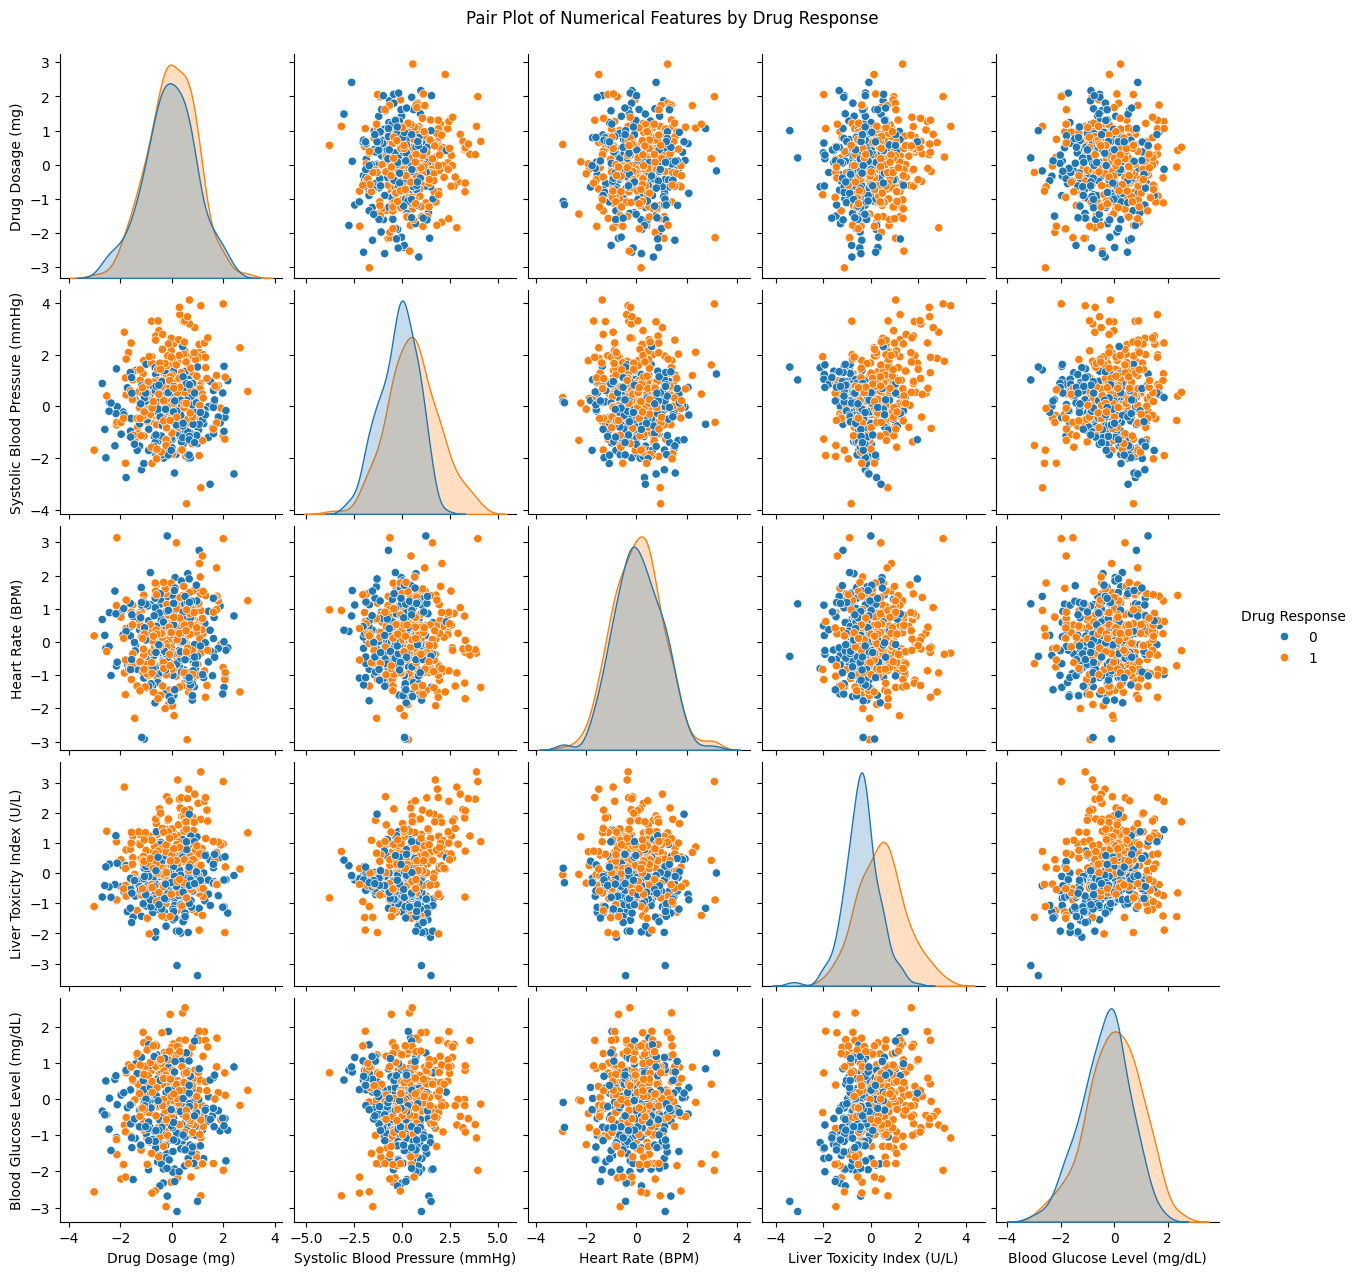

In [7]:
print("Generating a pair plot to visualize relationships between numerical features, colored by 'Drug Response'...")
sns.pairplot(df, hue='Drug Response', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Drug Response', y=1.02)
plt.show()

## SVM Implementation

Implement a basic SVM classifier using Python libraries like scikit-learn. Train the SVM model on the training data and evaluate model performance on the testing data using appropriate metrics such as accuracy, precision, recall, and F1-score.


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Required libraries for SVM implementation and evaluation have been imported.")

Required libraries for SVM implementation and evaluation have been imported.


In [9]:
print("Instantiating and training the SVM classifier...")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

print("Making predictions on the test data...")
y_pred = svm_model.predict(X_test)

print("Evaluating model performance...")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Instantiating and training the SVM classifier...
Making predictions on the test data...
Evaluating model performance...

Accuracy: 0.8200
Precision: 0.8654
Recall: 0.8036
F1-Score: 0.8333


## Visualization of SVM Results

Visualize classification results on the testing data, specifically by creating a confusion matrix.


## Parameter Tuning and Optimization

Experiment with different SVM hyperparameters (e.g., kernel type, C parameter, gamma) using techniques like GridSearchCV or RandomizedSearchCV to optimize model performance.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

print("Defining parameter grid for GridSearchCV...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

print("Instantiating SVC classifier...")
svm_base = SVC(random_state=42)

print("Creating GridSearchCV object and fitting to training data...")
grid_search = GridSearchCV(svm_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation score:")
print(f"{grid_search.best_score_:.4f}")

Defining parameter grid for GridSearchCV...
Instantiating SVC classifier...
Creating GridSearchCV object and fitting to training data...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters found:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Best cross-validation score:
0.7575


In [12]:
print("Training the SVM model with the best parameters found by GridSearchCV...")
svm_optimized = SVC(**grid_search.best_params_, random_state=42)
svm_optimized.fit(X_train, y_train)

print("Making predictions on the test data with the optimized SVM model...")
y_pred_optimized = svm_optimized.predict(X_test)

print("Evaluating the optimized model performance...")
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print(f"\nOptimized Model Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized Model Precision: {precision_optimized:.4f}")
print(f"Optimized Model Recall: {recall_optimized:.4f}")
print(f"Optimized Model F1-Score: {f1_optimized:.4f}")


Training the SVM model with the best parameters found by GridSearchCV...
Making predictions on the test data with the optimized SVM model...
Evaluating the optimized model performance...

Optimized Model Accuracy: 0.7800
Optimized Model Precision: 0.8036
Optimized Model Recall: 0.8036
Optimized Model F1-Score: 0.8036


## Comparison and Analysis

Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function) based on the chosen evaluation metrics. Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results. Discuss practical implications of SVM in real-world classification tasks.


In [13]:
print("Extracting and preparing GridSearchCV results for kernel comparison...")

# 1. Extract the cv_results_ from the grid_search object.
results = grid_search.cv_results_

# 2. Create a pandas DataFrame from these results.
results_df = pd.DataFrame(results)

# 3. Filter the DataFrame to show the 'mean_test_score', 'std_test_score', 'param_kernel', 'param_C', and 'param_gamma' columns.
filtered_results = results_df[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]

print("Filtered GridSearchCV results:")
print(filtered_results.head())

Extracting and preparing GridSearchCV results for kernel comparison...
Filtered GridSearchCV results:
  param_kernel  param_C  param_gamma  mean_test_score  std_test_score
0          rbf      0.1          1.0            0.550        0.017678
1       linear      0.1          1.0            0.695        0.043012
2         poly      0.1          1.0            0.650        0.033541
3          rbf      0.1          0.1            0.720        0.036742
4       linear      0.1          0.1            0.695        0.043012


In [14]:
print("Identifying best performing parameter combination for each kernel type...")

best_kernel_performance = filtered_results.loc[filtered_results.groupby('param_kernel')['mean_test_score'].idxmax()]

print("\nComparative Summary of SVM Kernel Performance:")
for index, row in best_kernel_performance.iterrows():
    print(f"- Kernel: {row['param_kernel']}")
    print(f"  Best C: {row['param_C']}")
    print(f"  Best Gamma: {row['param_gamma']}")
    print(f"  Mean Test Score: {row['mean_test_score']:.4f}")
    print(f"  Standard Deviation: {row['std_test_score']:.4f}")
    print("----------------------------------------")

Identifying best performing parameter combination for each kernel type...

Comparative Summary of SVM Kernel Performance:
- Kernel: linear
  Best C: 0.1
  Best Gamma: 1.0
  Mean Test Score: 0.6950
  Standard Deviation: 0.0430
----------------------------------------
- Kernel: poly
  Best C: 10.0
  Best Gamma: 0.1
  Mean Test Score: 0.6625
  Standard Deviation: 0.0411
----------------------------------------
- Kernel: rbf
  Best C: 1.0
  Best Gamma: 1.0
  Mean Test Score: 0.7575
  Standard Deviation: 0.0437
----------------------------------------


## Summary:

### Data Analysis Key Findings

*   The dataset contains 500 entries and 6 columns (5 features and 1 target variable, 'Drug Response'), with no missing values.
*   The 'Drug Response' target variable is binary (0 or 1) and relatively balanced, with a mean of 0.52.
*   Exploratory Data Analysis (EDA) revealed that 'Liver Toxicity Index (U/L)' (0.43) and 'Systolic Blood Pressure (mmHg)' (0.31) have the strongest positive correlations with 'Drug Response'. 'Drug Dosage (mg)' (0.04) and 'Heart Rate (BPM)' (-0.01) show very weak correlations.
*   Pair plots suggested that the classification task is likely not perfectly linearly separable, indicating a potential need for non-linear models or kernels.
*   An initial SVM classifier (using the default RBF kernel) achieved an accuracy of 0.8200, precision of 0.8654, recall of 0.8036, and an F1-score of 0.8333 on the test set.
*   Hyperparameter tuning using GridSearchCV identified 'C': 1, 'gamma': 1, and 'kernel': 'rbf' as the best parameters, yielding a best cross-validation accuracy of 0.7575.
*   The optimized SVM model, trained with the best parameters, performed with an accuracy of 0.7800, precision of 0.8036, recall of 0.8036, and an F1-score of 0.8036 on the test set.
*   Comparison of different kernels showed that the Radial Basis Function (RBF) kernel significantly outperformed the linear (mean test score: 0.6950) and polynomial (mean test score: 0.6625) kernels, with a best mean test score of 0.7575. This supports the non-linear nature of the decision boundary.
*   SVMs offer strengths such as versatility with kernels and robustness to overfitting (with proper tuning) but are sensitive to parameter tuning and can be computationally expensive for large datasets.


